In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.datasets import make_blobs
from svm import MultiClassSVM
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score

In [3]:
# Load the CSV file into a DataFrame
data_path = '/home/busenaz/Desktop/Data_Project/FourClassDS.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataframe
print(data.head())

   Unnamed: 0       0       1       2       3       4       5       6       7  \
0           0   872.0   872.0   874.0   874.0   876.0   876.0   878.0   880.0   
1           1  2472.0  2464.0  2460.0  2464.0  2464.0  2492.0  2504.0  2488.0   
2           2  1026.0  1004.0   974.0   968.0   978.0   988.0   998.0  1278.0   
3           3  1942.0  1944.0  1950.0  1956.0  1960.0  1966.0  1890.0  1892.0   
4           4  2120.0  2116.0  2116.0  2108.0  2104.0  2104.0  2112.0  2112.0   

        8  ...     351     352     353     354     355     356     357  \
0   882.0  ...   882.0   880.0   878.0   876.0   876.0   876.0   876.0   
1  2500.0  ...  2532.0  2524.0  2528.0  2512.0  2504.0  2496.0  2488.0   
2  1276.0  ...  1570.0  1570.0  1574.0  1574.0  2220.0  2220.0  2220.0   
3  1894.0  ...  1448.0  1448.0  1444.0  1444.0  1444.0  1448.0  1448.0   
4  2116.0  ...  2136.0  2128.0  2124.0  2120.0  2116.0  2112.0  2112.0   

      358     359  id  
0   876.0   874.0   0  
1  2480.0  2476.0   

In [4]:
# Drop the redundant column
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Separate features and labels
X = data_cleaned.drop(columns=['id'])
y = data_cleaned['id']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensionality to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Display the transformed features shape and variance ratio
X_pca_shape = X_pca.shape
explained_variance = pca.explained_variance_ratio_

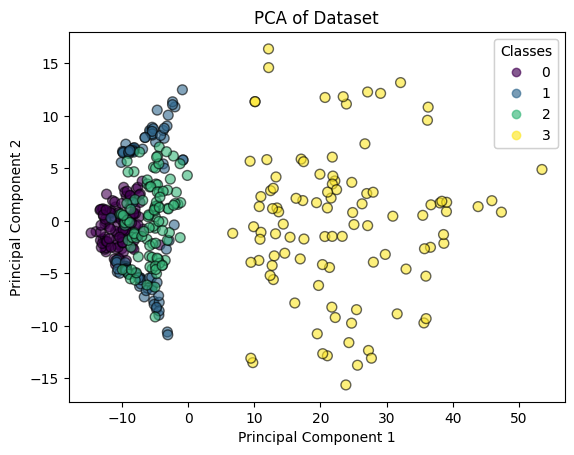

In [5]:
# Plotting the PCA-transformed data
fig, ax = plt.subplots()
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50, alpha=0.6)
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
ax.set_title('PCA of Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.show()

In [6]:
# Printing the variance explained by the PCA components
print("Variance explained by the first 2 PCA components:", explained_variance)

Variance explained by the first 2 PCA components: [0.57849429 0.07573446]


In [10]:
# Separate features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


In [11]:
classifier = MultiClassSVM()
classifier.train(X_train, y_train)
predictions = classifier.predict(X_train)
print(predictions)

[3 2 0 2 2 2 2 2 2 3 2 2 2 0 0 2 2 2 0 2 3 3 0 2 0 3 3 0 2 3 3 2 2 0 3 2 0
 0 3 0 3 0 2 3 0 2 0 0 0 2 3 0 0 2 2 2 3 2 2 0 2 2 0 3 2 2 2 2 0 0 3 0 2 2
 3 2 2 3 3 3 2 2 2 3 2 0 3 3 2 2 0 0 0 3 2 0 2 3 2 0 2 3 2 2 3 2 2 0 2 2 2
 3 0 2 2 2 0 0 2 2 3 3 0 3 3 0 3 2 0 2 3 2 0 2 3 2 0 2 2 2 0 2 0 3 2 2 0 3
 0 0 2 2 2 3 0 2 0 3 3 2 2 0 2 2 2 2 3 3 0 0 3 2 2 2 2 0 2 2 2 2 2 3 0 0 0
 0 3 3 3 0 2 2 2 2 0 2 2 2 0 3 0 0 3 3 2 0 0 2 2 3 2 2 3 3 2 2 3 0 0 3 2 2
 3 2 2 0 2 0 2 2 0 2 0 3 3 2 2 2 2 0 0 2 0 2 2 3 0 0 3 3 0 0 2 0 2 2 3 2 2
 0 2 2 0 3 2 0 2 2 0 2 0 0 0 2 2 2 2 2 3 3 3 0 0 2 2 3 0 2 3 3 3 2 3 3 3 3
 2 2 0 2 3 3 2 0 0 0 0 2 3 2 2 2 2 2 0 0 2 2 2 3 3 3 0 3 0 2 2 2]


In [12]:
train_predictions = classifier.predict(X_train)
test_predictions = classifier.predict(X_test)



In [13]:
print(accuracy_score(y_train, train_predictions))

0.2804878048780488


In [14]:
print(accuracy_score(y_test, test_predictions))

0.3132530120481928


In [15]:
conf_matrix_train = confusion_matrix(y_train, train_predictions)
conf_matrix_test = confusion_matrix(y_test, test_predictions)

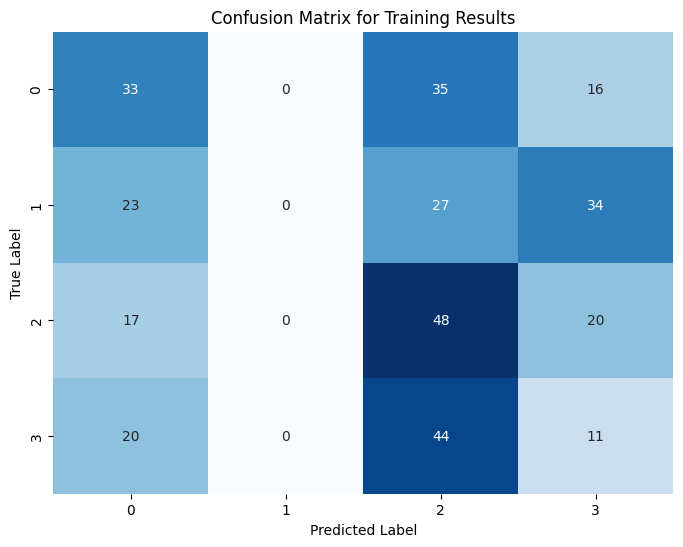

In [16]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Training Results')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [17]:
macro_prec = precision_score(y_train, train_predictions, average='macro')
micro_prec = precision_score(y_train, train_predictions, average='micro')

macro_recall = recall_score(y_train, train_predictions, average='macro')
micro_recall = recall_score(y_train, train_predictions, average='micro')

macro_f1 = f1_score(y_train, train_predictions, average='macro')
micro_f1 = f1_score(y_train, train_predictions, average='micro')

print("Precision | Micro: ", micro_prec, " Macro: ", macro_prec)
print("Recall | Micro: ", micro_recall, " Macro: ", macro_recall)
print("F1 Score | Micro: ", micro_f1, " Macro: ", macro_f1)

Precision | Micro:  0.2804878048780488  Macro:  0.20058237262538336
Recall | Micro:  0.2804878048780488  Macro:  0.27605742296918767
F1 Score | Micro:  0.2804878048780488  Macro:  0.2288951592813021


/home/busenaz/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


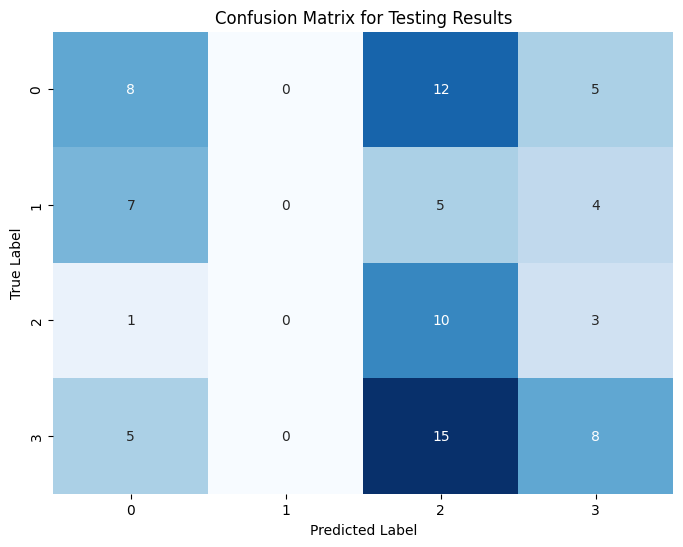

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Testing Results')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
macro_prec = precision_score(y_test, test_predictions, average='macro')
micro_prec = precision_score(y_test, test_predictions, average='micro')

macro_recall = recall_score(y_test, test_predictions, average='macro')
micro_recall = recall_score(y_test, test_predictions, average='micro')

macro_f1 = f1_score(y_test, test_predictions, average='macro')
micro_f1 = f1_score(y_test, test_predictions, average='micro')

print("Precision | Micro: ", micro_prec, " Macro: ", macro_prec)
print("Recall | Micro: ", micro_recall, " Macro: ", macro_recall)
print("F1 Score | Micro: ", micro_f1, " Macro: ", macro_f1)